# 03. Convolution Neural Networks and Computer Vision with TensorFlow

Going to cover:
* Getting a dataset to work
* Architecture of convolution neural network
* A quick end-to-end example
* Steps in modelling for binary image classification with CNNs
    * Becoming one with the data
    * Preparing data for modelling
    * Creating a CNN model
    * Fitting a model
    * Evaluating a model
    * Improving a model
    * Making a prdiction with trained model
* Steps in modelling for multi-class image clasfication with CNNs
* Same as above (With different dataset)

## Creating data to view and fit

In [43]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [44]:
# Check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [45]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [46]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


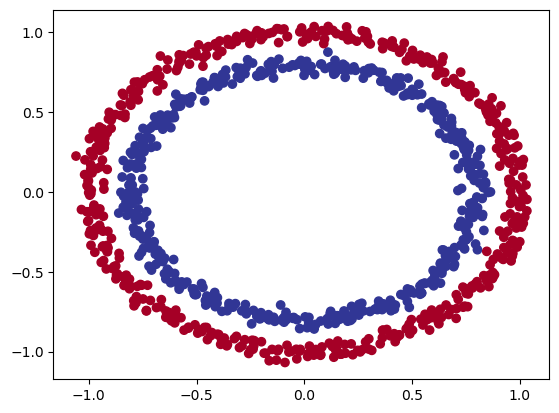

In [47]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shape

In [48]:
# Check the shape of features and labels
x.shape, y.shape

((1000, 2), (1000,))

## Steps in modeling
1. Create or import a model
2. Compile the model
3. Fit the model
4. evaluate the model
5. Tweak
6. Evaluate...

In [49]:
import tensorflow as tf
# Set random seeds
tf.random.set_seed(42)
# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])



# Fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 4ms/step - loss: 5.9047 - accuracy: 0.4860
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 5.3436 - accuracy: 0.4970
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 3.4020 - accuracy: 0.5140
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 1.1558 - accuracy: 0.4780
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7094 - accuracy: 0.4890


In [50]:
# Traning for longer time
model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [51]:
# Set the random seeds
tf.random.set_seed(42)

# Create a model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])



# Fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [52]:
# Evaluate the model
model_2.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932944059371948, 0.5]

## Improving the model
1. Create a model with more layers
2. compiling model with differnt optimizer
3. Fitting the model

In [53]:
# Set random seeds
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [54]:
# Evaluate the model
model_3.evaluate(x, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.7013 - accuracy: 0.5050


[0.7012707591056824, 0.5049999952316284]

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, x, y):
    """
    Plot the decision boundary created by a model prediction on x.
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Create x value
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 [==============================] - 1s 2ms/step
Binary classification


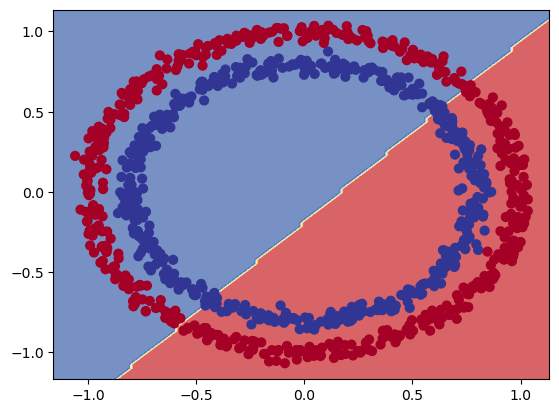

In [58]:
# Check out prediction 
plot_decision_boundary(model=model_3, x=x, y=y)

In [84]:
# See if can be used for regression problem..
tf.random.set_seed(42)

# Create some regression data
x_regression = tf.range(10, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split regression data into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[152:]

# Fit model to the regression data
#model_3.fit(x_reg_train, y_reg_train, epochs=100)

In [85]:
# Set random seeds
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: 304.3009 - mae: 304.3009
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 166.3114 - mae: 166.3114
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 54.5384 - mae: 54.5384
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 80.9542 - mae: 80.9542
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 74.0236 - mae: 74.0236
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 41.8180 - mae: 41.8180
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.8391 - mae: 45.8391
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 38.0334 - mae: 38.0334
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 39.3344 - mae: 39.3344
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 37.8281 - mae: 37.8281
Epoch 11/100
5/5 [==============================] - 0s

2/2 [==============================] - 0s 4ms/step


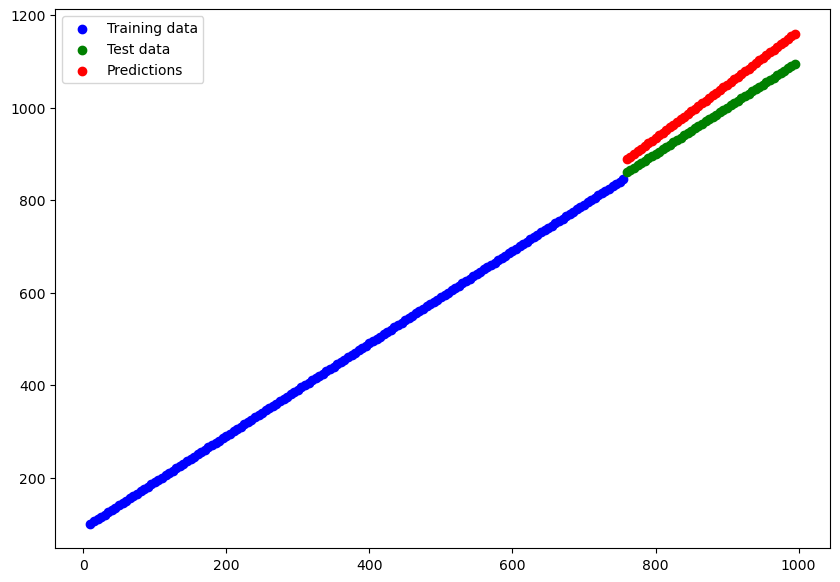

In [86]:
# Make predictions with our trained model
y_reg_prads = model_3.predict(x_reg_test)

# plot the model's predictions against regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_prads, c="r", label="Predictions")
plt.legend();

### The missing piece: Non-linearity

In [87]:
# Set the random seeds
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(x, y, epochs=100)

Epoch 1/100


c:\Users\Vass\anaconda3\envs\tf_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 1s 8ms/step - loss: 6.0471 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0118 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0048 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 6.0021 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 6.0000 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 5.9800 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9555 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9449 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9503 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9494 - accuracy: 0.4840
Epoch 11/100
32/32 [=

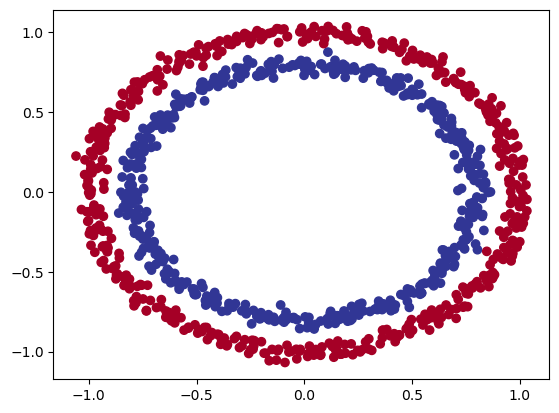

In [88]:
# Check out the data

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
Binary classification


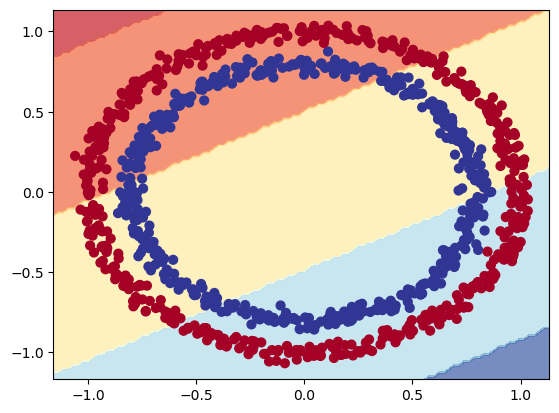

In [89]:
# Check the decision boundary for last model
plot_decision_boundary(model=model_4, x=x, y=y)

In [92]:
from tensorflow.keras.utils import plot_model
plot_model(model=model_4, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualizing our model's predictions

# ---------------------------------------------------------------------

# Working with a larger example ( Multiclass classification)

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data already has been sorted into tranining and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 13s 3us/step


In [3]:
# Show the first training example
print(f"Training salmpe:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training salmpe:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# Check the shape of the data
train_data[0].shape, train_labels[0].shape

((28, 28), ())

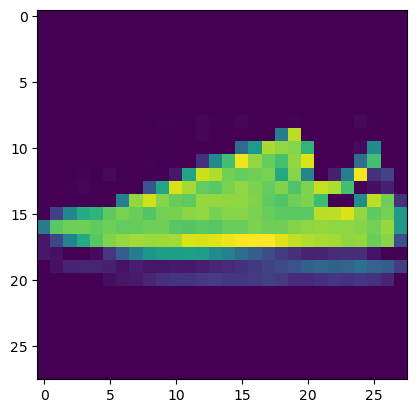

In [5]:
# Plot a single data
import matplotlib.pyplot as plt
plt.imshow(train_data[6])

In [6]:
# Check the sample label
train_labels[7]

2

In [8]:
# Create a small list
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

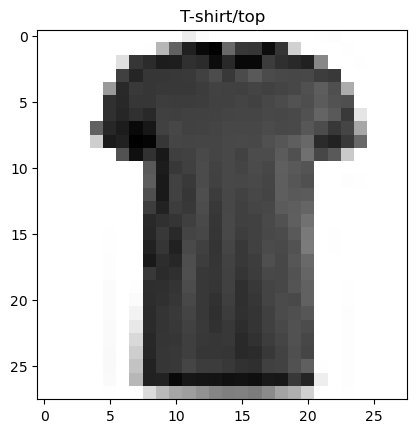

In [9]:
# Plot an example image and it's labels
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

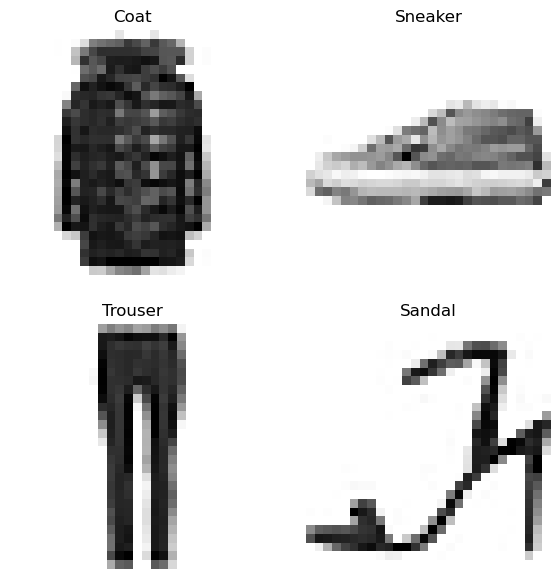

In [10]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a Multiclass Classification Model

